> KNN (K-Nearest Neighbours)

KNN adalah Model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat

In [106]:
# Program Prediksi Status Pernikahan
import pandas as pd

gaji = {
    'usia': [28, 35, 42, 21, 29, 45, 39, 26, 32, 37, 20],
    'gaji': [5000000, 7500000, 10000000, 2500000, 5600000, 8000000, 6200000, 4500000, 6900000, 7200000, 3800000],
    'status': ['menikah', 'menikah', 'menikah', 'belum menikah', 'belum menikah', 'menikah', 'menikah', 'belum menikah', 'belum menikah', 'menikah', 'belum menikah']
}

gaji_df = pd.DataFrame(gaji)
gaji_df

,usia,gaji,status
0,28,5000000,menikah
1,35,7500000,menikah
2,42,10000000,menikah
3,21,2500000,belum menikah
4,29,5600000,belum menikah
5,45,8000000,menikah
6,39,6200000,menikah
7,26,4500000,belum menikah
8,32,6900000,belum menikah
9,37,7200000,menikah


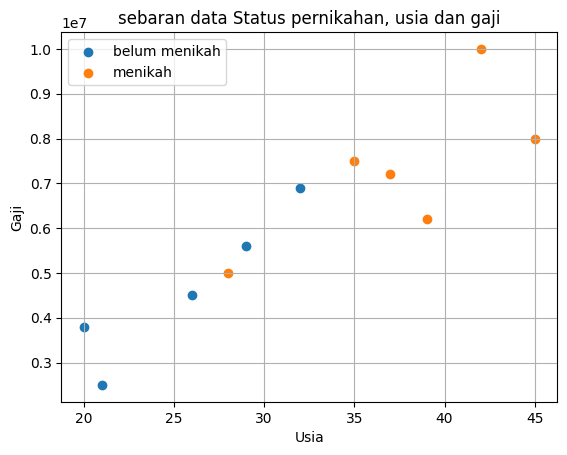

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in gaji_df.groupby('status'):
    ax.scatter(d['usia'], d['gaji'], label=jk)

plt.legend(loc='upper left')
plt.title("sebaran data Status pernikahan, usia dan gaji")
plt.xlabel('Usia')
plt.ylabel('Gaji')
plt.grid(True)
plt.show()

In [108]:
# Preprocessing Dataset 

import numpy as np

x_train = np.array(gaji_df[['usia', 'gaji']])
y_train = np.array(gaji_df['status'])

print(f'x_train : \n {x_train}\n')
print(f'y_train: \n {y_train}\n')

x_train : 
 [[      28  5000000]
 [      35  7500000]
 [      42 10000000]
 [      21  2500000]
 [      29  5600000]
 [      45  8000000]
 [      39  6200000]
 [      26  4500000]
 [      32  6900000]
 [      37  7200000]
 [      20  3800000]]

y_train: 
 ['menikah' 'menikah' 'menikah' 'belum menikah' 'belum menikah' 'menikah'
 'menikah' 'belum menikah' 'belum menikah' 'menikah' 'belum menikah']



In [109]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train : {y_train}')


y_train : [[1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]


In [110]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [1 1 1 0 0 1 1 0 0 1 0]


In [111]:
from sklearn.neighbors import KNeighborsClassifier

# Classification Task 
# digunakan untuk jumlah tetangga terdekat
K = 3
model  = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [112]:
usia = 23
gaji = 7_000_000

x_new = np.array([usia, gaji]).reshape(1,-1)
x_new

array([[     23, 7000000]])

In [113]:
y_new = model.predict(x_new)
y_new

array([1])

In [114]:
lb.inverse_transform(y_new)

array(['menikah'], dtype='<U13')

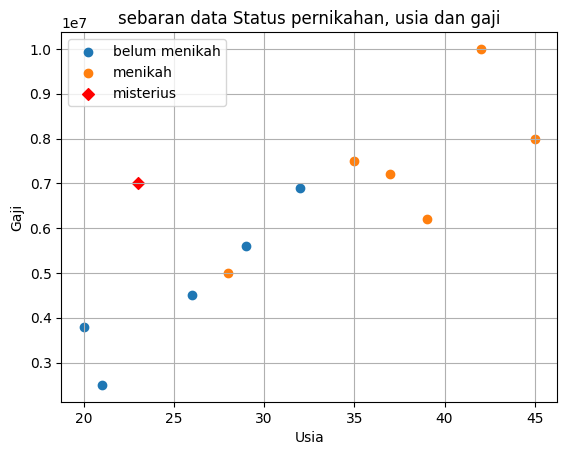

In [115]:
fig, ax = plt.subplots()
for jk, d in gaji_df.groupby('status'):
    ax.scatter(d['usia'], d['gaji'], label=jk)

plt.scatter(usia, gaji, marker='D', color='red', label='misterius')

plt.legend(loc='upper left')
plt.title("sebaran data Status pernikahan, usia dan gaji")
plt.xlabel('Usia')
plt.ylabel('Gaji')
plt.grid(True)
plt.show()

In [116]:
# Kalkulasi Euclidean Distance
misterius = np.array([usia, gaji])
misterius

array([     23, 7000000])

In [117]:
x_train

array([[      28,  5000000],
       [      35,  7500000],
       [      42, 10000000],
       [      21,  2500000],
       [      29,  5600000],
       [      45,  8000000],
       [      39,  6200000],
       [      26,  4500000],
       [      32,  6900000],
       [      37,  7200000],
       [      20,  3800000]], dtype=int64)

In [118]:
from scipy.spatial.distance import euclidean

jarak_data = [euclidean(misterius, d) for d in x_train]
jarak_data 

[2000000.00000625,
 500000.000144,
 3000000.0000601667,
 4500000.000000444,
 1400000.0000128571,
 1000000.000242,
 800000.00016,
 2500000.0000018,
 100000.000405,
 200000.00049,
 3200000.0000014063]

In [119]:
gaji_df['jarak'] = jarak_data
gaji_df.sort_values(['jarak'])

,usia,gaji,status,jarak
8,32,6900000,belum menikah,1.000000e+05
9,37,7200000,menikah,2.000000e+05
1,35,7500000,menikah,5.000000e+05
6,39,6200000,menikah,8.000000e+05
5,45,8000000,menikah,1.000000e+06
4,29,5600000,belum menikah,1.400000e+06
0,28,5000000,menikah,2.000000e+06
7,26,4500000,belum menikah,2.500000e+06
2,42,10000000,menikah,3.000000e+06
10,20,3800000,belum menikah,3.200000e+06


> HASIL PENGAMATAN

Berdasarkan hasil Tabel, dapat dilihat 3 neighbour Terdekat itu status pernikahan yaitu belum menikah, menikah, menikah. yang dimana status yang paling banyak menikah.

In [120]:
# EVALUASI KNN Classification Model
# Testing Set

x_test = np.array([[30, 5500000], [40, 9000000], [25, 3000000],[38, 7000000]])
y_test = lb.transform(np.array(['menikah', 'menikah', 'belum menikah', 'belum menikah'])).flatten()

print(f'x_test : {x_test}\n')
print(f'y_test : {y_test}\n')

x_test : [[     30 5500000]
 [     40 9000000]
 [     25 3000000]
 [     38 7000000]]

y_test : [1 1 0 0]



In [121]:
# Prediksi terhadap Testing set

y_prediction = model.predict(x_test)
y_prediction

array([1, 1, 0, 1])

In [122]:
# METRIK EVALUASI
# Accuracy - Akurasi
# accuracy = (tp + tn) / tp + tn + fp + fn

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_prediction)
print(f'Accuracy : {accuracy}')

Accuracy : 0.75


In [123]:
# Precission - Presisi
# precission = tp / (tp + fp)

from sklearn.metrics import precision_score

precission = precision_score(y_test, y_prediction)

print(f'Precission : {precission}')

Precission : 0.6666666666666666


In [127]:
# Recall
# recall = tp / (tp + fn)

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_prediction)

print(f'Recall : {recall}')

Recall : 1.0


In [125]:
# F1 Score
# f1 = 2 x (precission x recall / precission + recall)

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_prediction)

print(f'F1-Score : {f1}')

F1-Score : 0.8


In [133]:
# CLASSIFICATION REPORT 

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_prediction)

print(f'Classification Report :\n {cls_report}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [131]:
# Matthews Correlation Coefficient (MCC)
# MCC = (tp x tn + fp x fn) / sqrt((tp+fp) x (tp + fn) x (tn + fp) x (tn + fn))
# Batas : -1 (terburuk) sampai ke 1 (terbaik)

from sklearn.metrics import matthews_corrcoef

MCC = matthews_corrcoef(y_test, y_prediction)
print(f'MCC : {MCC}')

MCC : 0.5773502691896258
